In [1]:
import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class NNA(object):
    def __init__(self):
        self.nn_0 = 20
        self.nn_1 = 5
        self.nn_2 = 5
        self.nn_3 = 5
        self.W1 = 0.5*np.random.random((self.nn_1,self.nn_0))
        self.b1 = 0.5*np.random.random((self.nn_1,1))
        self.W2 = 0.5*np.random.random((self.nn_2,self.nn_1)) # Inicialización de las mattrices de pesos de cada capa
        self.b2 = 0.5*np.random.random((self.nn_2,1))
        self.W3 = 0.5*np.random.random((self.nn_3,self.nn_2))
        self.b3 = 0.5*np.random.random((self.nn_3,1))
        
        self.Z1 = np.zeros((self.nn_1,1))
        self.Y1 = np.zeros((self.nn_1,1))
        self.Z2 = np.zeros((self.nn_2,1))   # Inicialización de los vectores de entrada y salida de las capas
        self.Y2 = np.zeros((self.nn_2,1))
        self.Z3 = np.zeros((self.nn_3,1))
        self.Y3 = np.zeros((self.nn_3,1))
        
    def forward(self, Yo):                      # Función de propagación hacia adelante
        self.Z1 = np.dot(self.W1,Yo) + self.b1      # S1 = W1.Yo + b1
        self.Y1 = self.sig(self.Z1)                 # Y1 = F(S1)               
        self.Z2 = np.dot(self.W2,self.Y1) + self.b2 # S2 = W2.Yo + b2
        self.Y2 = self.sig(self.Z2)                 # Y2 = F(S2)             F-> función de activación
        self.Z3 = np.dot(self.W3,self.Y2) + self.b3 # S3 = W3.Yo + b3
        self.Y3 = self.sig(self.Z3)                 # Y3 = F(S3)
        
        return self.Y3
    
    def error(self, Yo, Yd):          # Calculo del error de la salida respecto a los valores deseados
        return Yd - self.forward(Yo)
     
    def errCuad(self, Yo, Yd):       # Calculo del valor cuadrático
        return np.diag(np.dot(self.error(Yo,Yd).T,self.error(Yo,Yd)))
    
    def backpropagation(self,Yo,Yd): # Retropropagación
        delta3 = 2*np.dot(self.dSig(self.Z3),self.error(Yo,Yd))
        dEdW3 = -np.dot(delta3,self.Y2.T)                             # componente de corrección para W1
        dEdb3 = -delta3
        
        delta2 = np.dot(np.dot(self.dSig(self.Z2),self.W3.T),delta3)
        dEdW2 = -np.dot(delta2,self.Y1.T)                             # componente de corrección para W3
        dEdb2 = -delta2
        
        delta1 = np.dot(np.dot(self.dSig(self.Z1),self.W2.T),delta2)
        dEdW1 = -np.dot(delta1,Yo.T)                                  # componente de corrección para W3
        dEdb1 = -delta1
        
        return dEdW3,dEdb3,dEdW2,dEdb2,dEdW1,dEdb1,
    
    def training(self,Yi,Ys):        # Entrenamiento de la red
        eta = 1
        i=0
#         for _ in range(5000):
        while max(self.errCuad(Yi,Ys)) > 1e-4 and i < 10000: # Criterio de parada
            for yo,yd in zip(Yi.T,Ys.T):
                # Actualización de los pesos de cada capa
                self.W3 = self.W3 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[0]
                self.b3 = self.b3 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[1]
                self.W2 = self.W2 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[2]
                self.b2 = self.b2 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[3]
                self.W1 = self.W1 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[4]
                self.b1 = self.b1 - eta*self.backpropagation(np.array([yo]).T,np.array([yd]).T)[5]
            
            i+=1
            eta = self.funEta(i)
        return i
    #############################################
    def sig(self, s):
        return 1/(1+np.exp(-s))
    
    def dSig(self, s):
        df = self.sig(s.T[0])*(1-self.sig(s.T[0]))
        ds = np.diag(df)
        return ds
    
    def funEta(self,var):
        if var <= 5000:
            return 1.0-(1.0*var/10000)
        else:
            return 0.7*np.exp(-0.0002*(var-5000))

In [3]:
A = np.array([[0,0,0,0],[0,1,1,0],[0,0,0,0],[0,1,1,0],[0,1,1,0]])  
E = np.array([[0,0,0,0],[0,1,1,1],[0,0,0,1],[0,1,1,1],[0,0,0,0]])
I = np.array([[0,0,0,0],[1,0,0,1],[1,0,0,1],[1,0,0,1],[0,0,0,0]])  # Valores de entrenamiento 
O = np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
U = np.array([[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]])

da = np.array([[1,0,0,0,0]]).T
de = np.array([[0,1,0,0,0]]).T
di = np.array([[0,0,1,0,0]]).T   # Valores deseados
do = np.array([[0,0,0,1,0]]).T
du = np.array([[0,0,0,0,1]]).T

# Concatenación de los elementos de entrada y salida

Yi = np.concatenate((np.array([A.ravel()]).T,\
                     np.array([E.ravel()]).T,\
                     np.array([I.ravel()]).T,\
                     np.array([O.ravel()]).T,\
                     np.array([U.ravel()]).T,\
                     np.array([U.ravel()]).T,\
                     np.array([O.ravel()]).T,\
                     np.array([I.ravel()]).T,\
                     np.array([E.ravel()]).T,\
                     np.array([A.ravel()]).T),axis=1)

Yd = np.concatenate(( da,de,di,do,du,du,do,di,de,da ),axis=1)

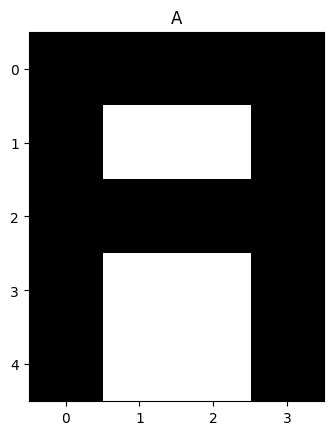

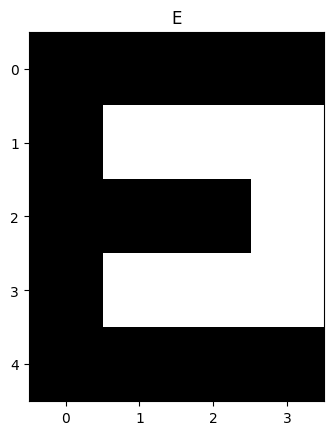

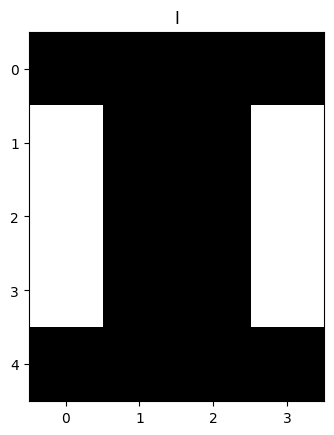

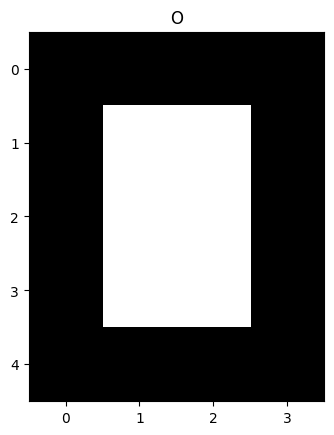

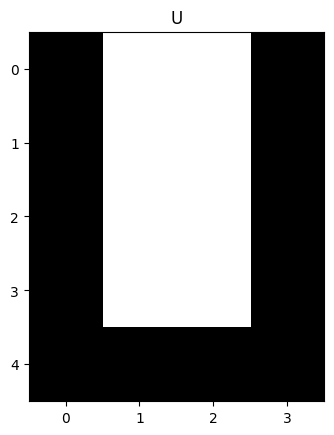

In [4]:
plt.imshow(A, cmap='gray'), plt.title('A')
plt.show()
plt.imshow(E, cmap='gray'), plt.title('E')
plt.show()
plt.imshow(I, cmap='gray'), plt.title('I')
plt.show()
plt.imshow(O, cmap='gray'), plt.title('O')
plt.show()
plt.imshow(U, cmap='gray'), plt.title('U')
plt.show()

In [5]:
nna = NNA()        # Se crea el objeto red neuronal
nna.training(Yi,Yd) # se realiza el entrenamiento de la red

10000

In [6]:
# Prueba Letra A:
At = np.array([A.ravel()]).T
print("Salida","      Valor deseado", "   Error")
for i in range(5):
    print((nna.forward(At)[i],7),"->   ", da[i],"->     ",nna.error(At,da)[i])

print("\nLos valores de salida son aproximados")

Salida       Valor deseado    Error
(array([0.98836456]), 7) ->    [1] ->      [0.01163544]
(array([0.00437682]), 7) ->    [0] ->      [-0.00437682]
(array([4.24438131e-09]), 7) ->    [0] ->      [-4.24438131e-09]
(array([0.00668774]), 7) ->    [0] ->      [-0.00668774]
(array([0.01184538]), 7) ->    [0] ->      [-0.01184538]

Los valores de salida son aproximados
